# **1. Perkenalan Dataset**


# Loan Approval Prediction Dataset (Kaggle)

## Deskripsi Dataset
Dataset *Loan Approval Prediction* digunakan untuk memprediksi apakah pengajuan pinjaman (loan) akan **disetujui (Approved)** atau **ditolak (Rejected)** berdasarkan informasi pemohon.

### Target Variabel
- **loan_status**
  - `Approved` : Pinjaman disetujui
  - `Rejected` : Pinjaman ditolak

### Fitur Dataset
- **loan_id** : ID unik setiap pengajuan pinjaman  
- **no_of_dependents** : Jumlah tanggungan pemohon  
- **education** : Tingkat pendidikan pemohon  
- **self_employed** : Status pekerjaan pemohon  
- **income_annum** : Pendapatan tahunan pemohon  
- **loan_amount** : Jumlah pinjaman yang diajukan  
- **loan_term** : Jangka waktu pinjaman  
- **cibil_score** : Skor kredit pemohon  
- **residential_assets_value** : Nilai aset residensial  
- **commercial_assets_value** : Nilai aset komersial  
- **luxury_assets_value** : Nilai aset mewah  
- **bank_asset_value** : Nilai aset di bank  
- **loan_status** : Status persetujuan pinjaman (target)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

In [2]:
data_path = "../loan_approval_dataset_raw.csv"

df = pd.read_csv(data_path)

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.columns = df.columns.str.strip()

df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [4]:
df.shape

(4269, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# **4. Exploratory Data Analysis (EDA)**

## Missing Value dan Duplikasi Data

In [7]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

## Distribusi Target Variable (Loan Status)

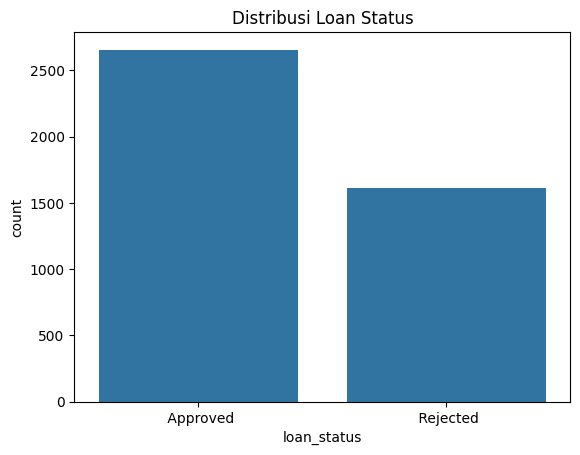

In [9]:
sns.countplot(x="loan_status", data=df)
plt.title("Distribusi Loan Status")
plt.show()

## Numeric and categorikal features

In [10]:
categorical_features = ["education", "self_employed", "loan_status"]
numerical_features = [
    "no_of_dependents",
    "income_annum",
    "loan_amount",
    "loan_term",
    "cibil_score",
    "residential_assets_value",
    "commercial_assets_value",
    "luxury_assets_value",
    "bank_asset_value"
]

## Distribusi Fitur Numerik

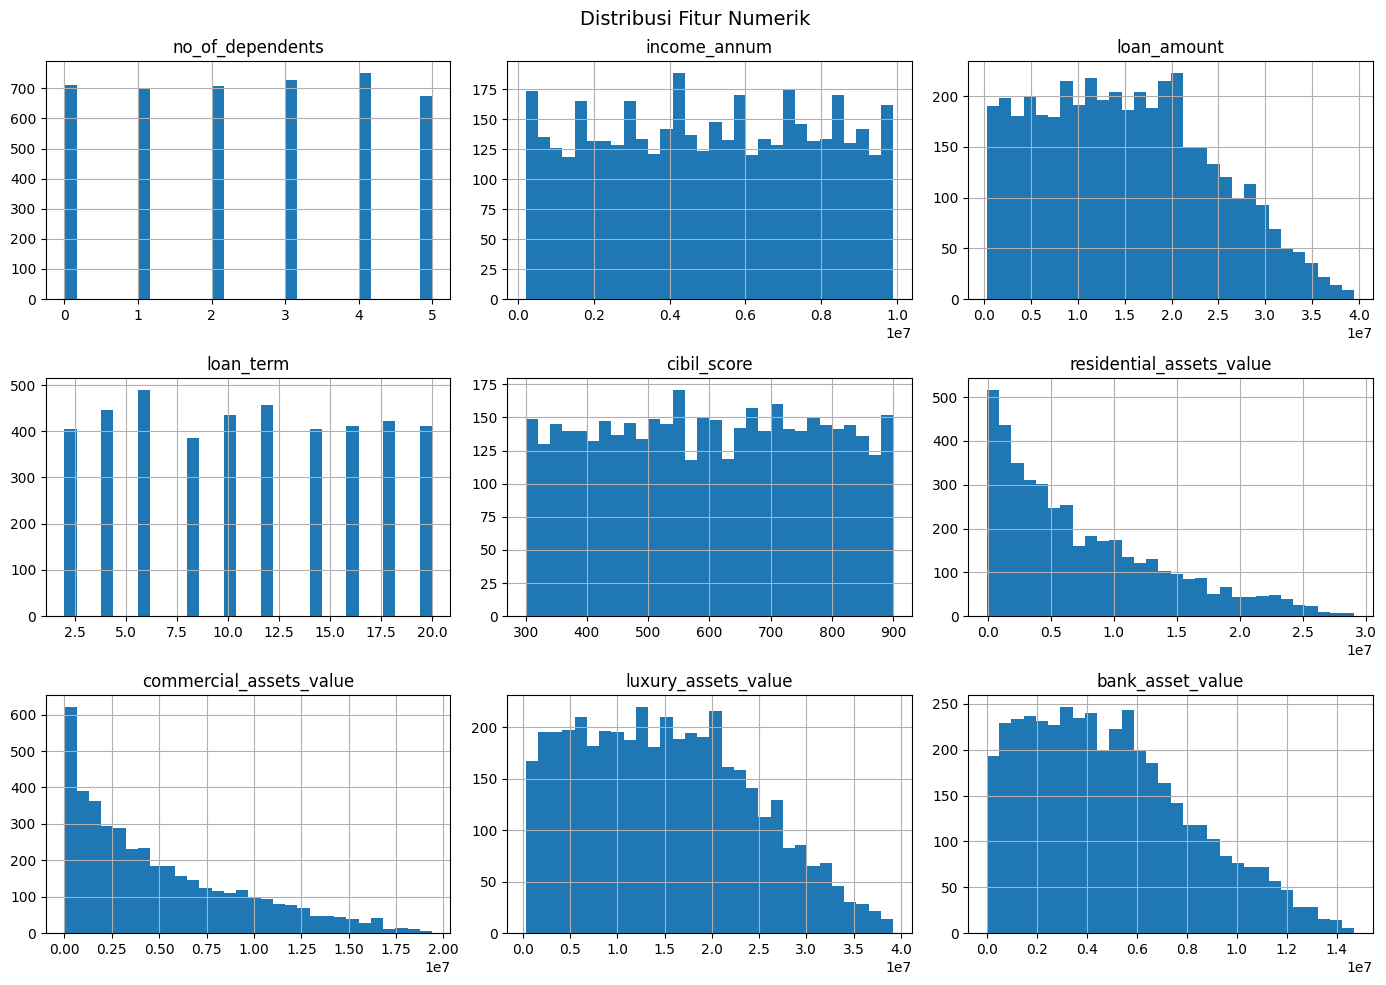

In [11]:
df[numerical_features].hist(bins=30, figsize=(14, 10))
plt.suptitle("Distribusi Fitur Numerik", fontsize=14)
plt.tight_layout()
plt.show()

## Distribusi Fitur Kategorikal

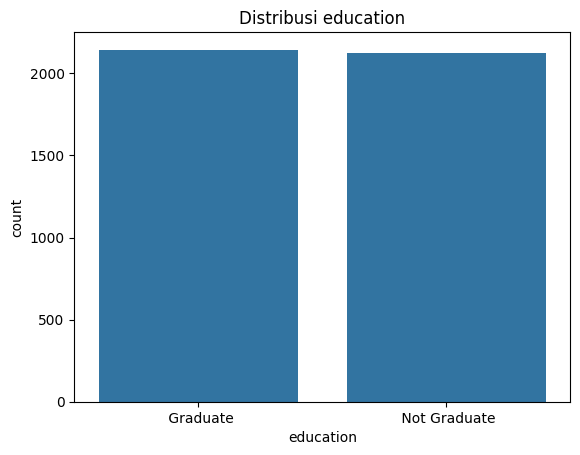

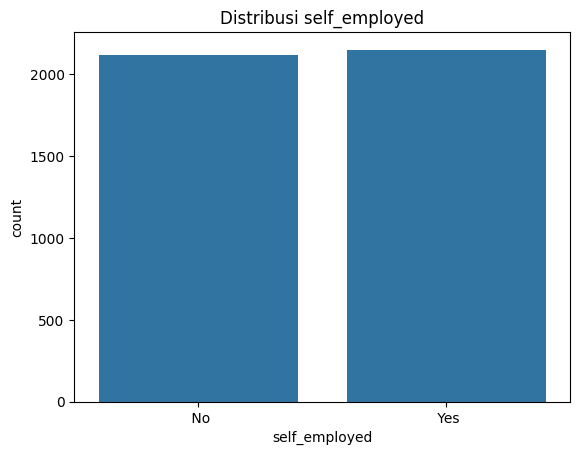

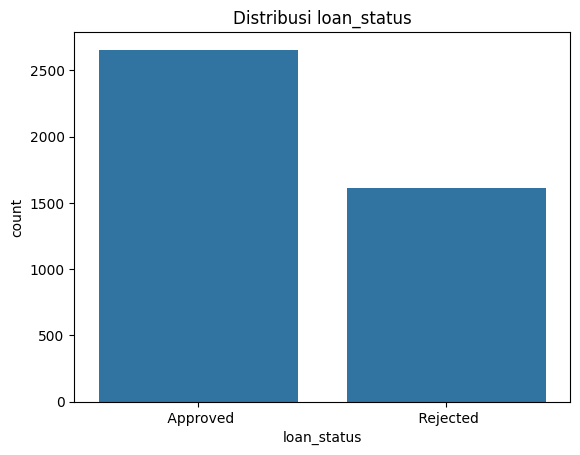

In [12]:
for col in categorical_features:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribusi {col}")
    plt.show()

## Korelasi Antar Fitur Numerik

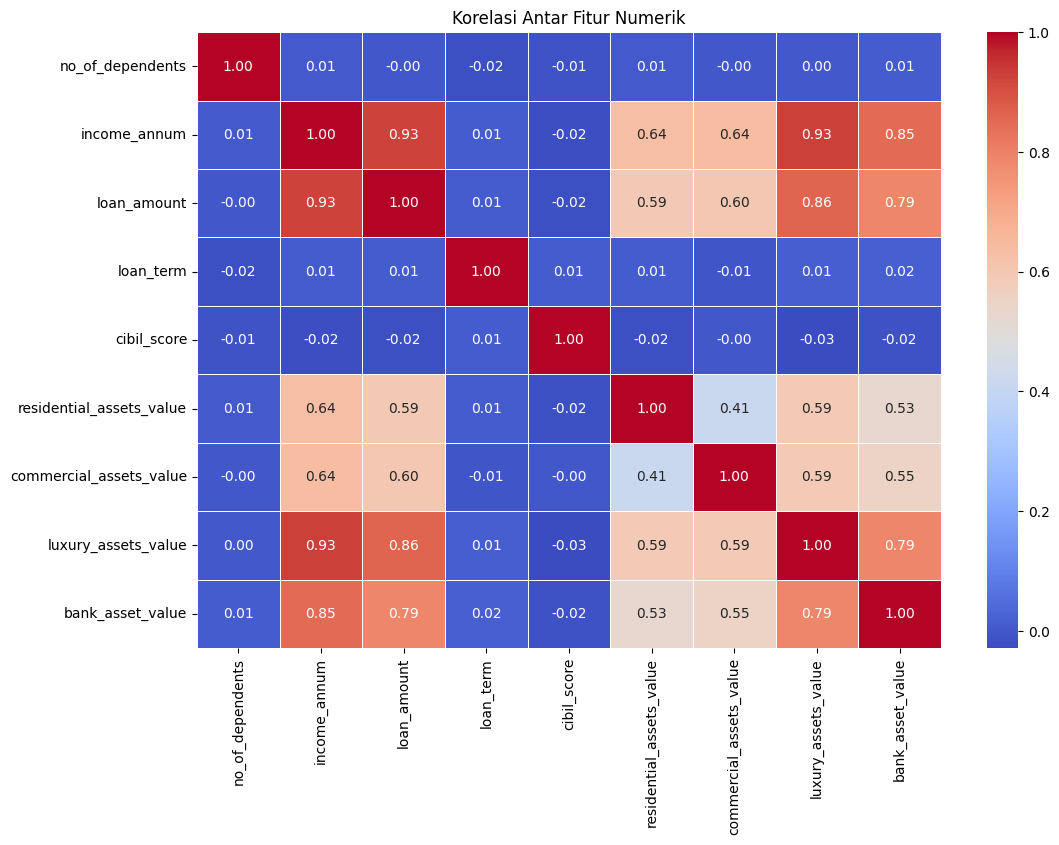

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df[numerical_features].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

## Hubungan Fitur Kategorikal terhadap Target (Loan Status)

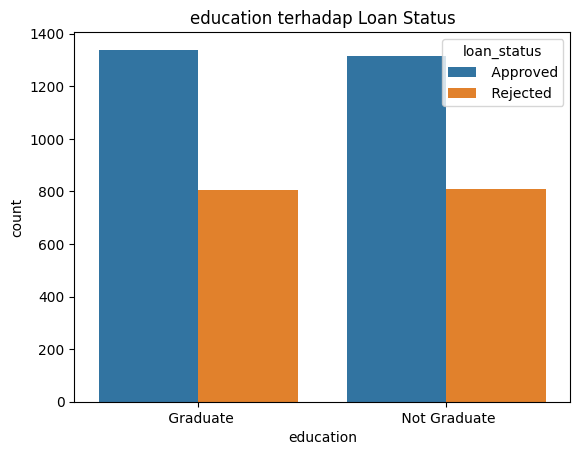

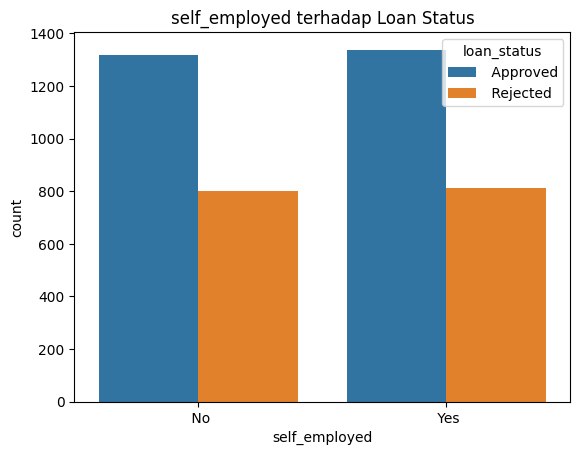

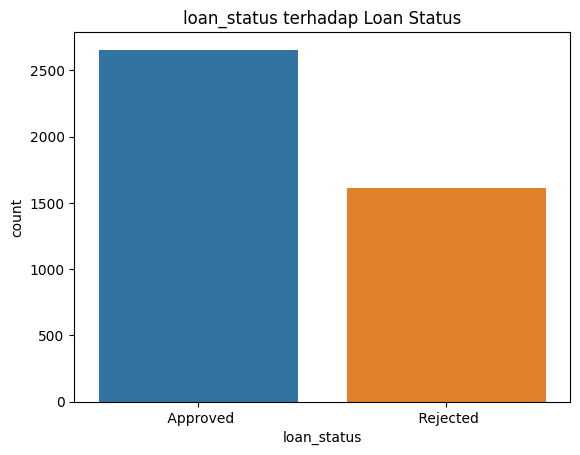

In [14]:
for col in categorical_features:
    sns.countplot(x=col, hue="loan_status", data=df)
    plt.title(f"{col} terhadap Loan Status")
    plt.show()

## Hubungan Fitur Kategorikal terhadap Target (Loan Status)

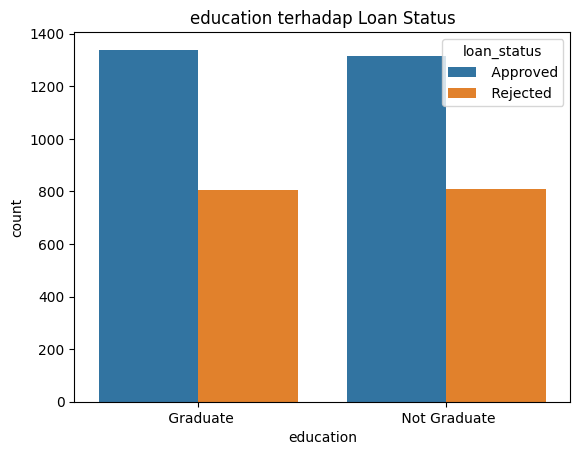

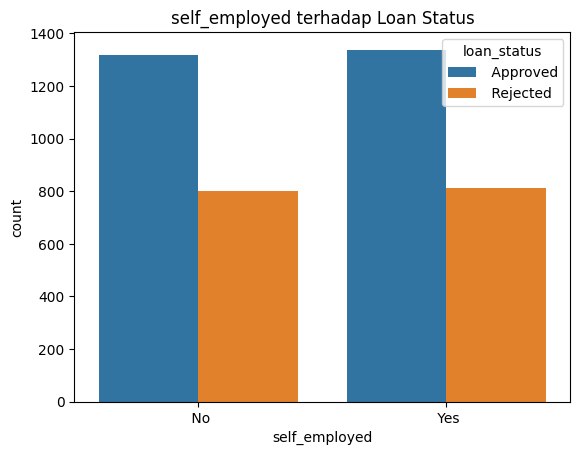

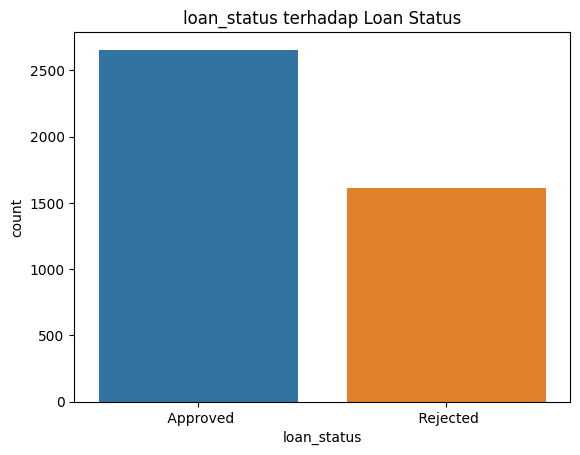

In [15]:
for col in categorical_features:
    sns.countplot(x=col, hue="loan_status", data=df)
    plt.title(f"{col} terhadap Loan Status")
    plt.show()

## Pairplot Hubungan Antar Fitur dan Target

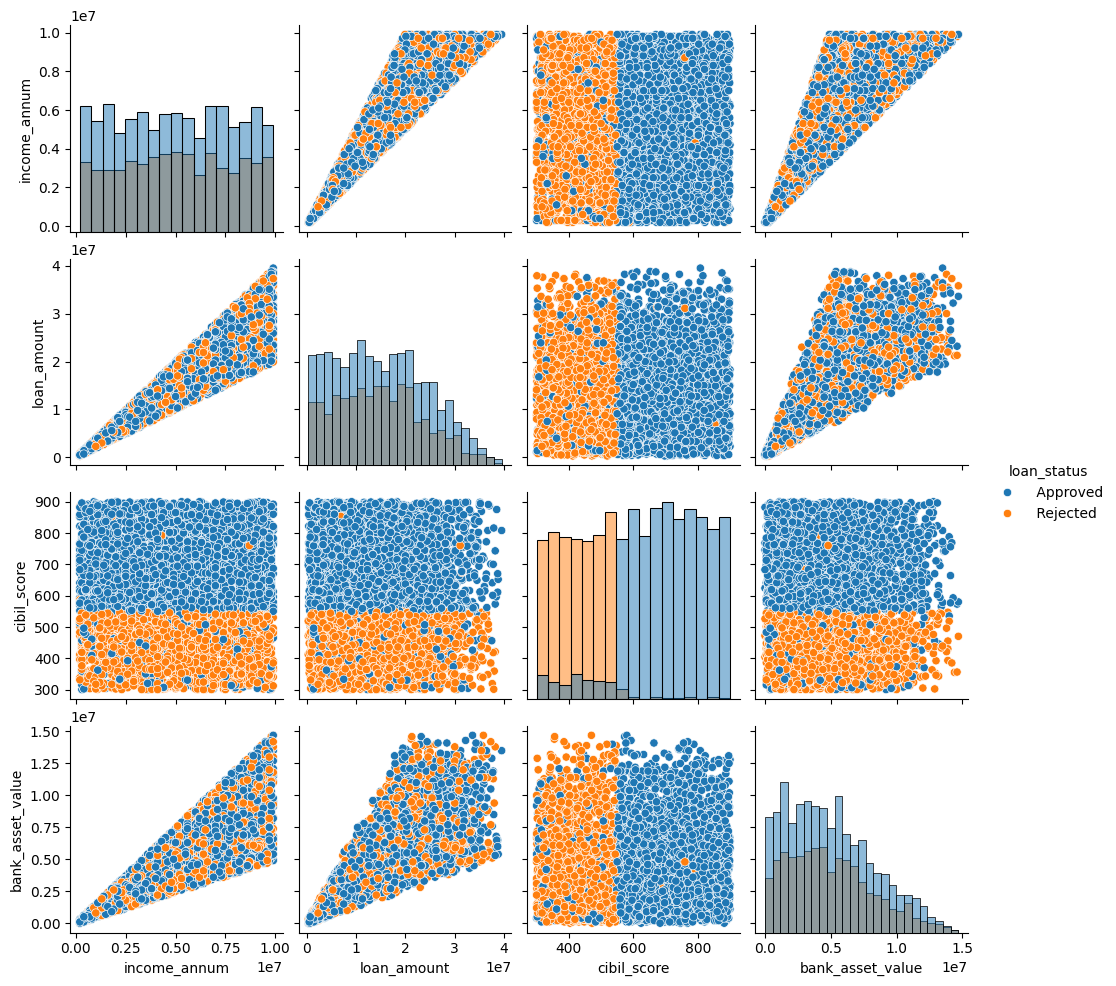

In [16]:
pairplot_features = [
    "income_annum",
    "loan_amount",
    "cibil_score",
    "bank_asset_value",
    "loan_status"
]

sns.pairplot(
    df[pairplot_features],
    hue="loan_status",
    diag_kind="hist"
)
plt.show()

# **5. Data Preprocessing**

## Penanganan Outlier

In [17]:
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.clip(df[col], lower_bound, upper_bound)

## Mapping

In [18]:
education_map = {'Not Graduate': 0, 'Graduate': 1}
self_employed_map = {'No': 0, 'Yes': 1}
loan_status_map = {'Rejected': 0, 'Approved': 1}

df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()

df['education'] = df['education'].map(education_map)
df['self_employed'] = df['self_employed'].map(self_employed_map)
df['loan_status'] = df['loan_status'].map(loan_status_map)


## Scaling Fitur

In [19]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

## Hasil Preprocessing

In [20]:
df.head(20)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,-0.294102,1,0,1.617979,1.633052,0.192617,1.032792,-0.783495,2.770319,0.832028,0.930707,1
1,2,-1.473548,0,1,-0.341750,-0.324414,-0.508091,-1.061051,-0.736995,-0.633638,-0.694993,-0.515991,0
2,3,0.295621,1,0,1.439822,1.610933,1.594031,-0.544840,-0.055003,-0.106426,1.996520,2.408185,0
3,4,0.295621,1,0,1.119139,1.721525,-0.508091,-0.771045,1.665478,-0.381493,0.897943,0.899926,0
4,5,1.475067,0,1,1.689242,1.002681,1.594031,-1.264055,0.766488,0.741698,1.568075,0.007282,0
5,6,-1.473548,1,1,-0.092330,-0.180645,-0.157737,-1.629463,-0.101502,0.764621,-0.156691,0.038063,0
6,7,1.475067,1,0,1.297296,1.975885,-1.208798,0.452780,2.331970,2.254568,1.546103,-0.208183,1
7,8,-0.294102,1,1,0.228353,-0.014758,1.594031,-1.264055,0.890487,0.168642,-0.365420,0.315090,0
8,9,-1.473548,1,1,-1.517587,-1.430327,1.594031,1.055993,-0.953993,-0.954550,-1.354139,-1.347073,1
9,10,1.475067,0,0,-1.410692,-1.198085,-0.157737,-1.229255,-0.659496,-0.817016,-1.299210,-1.039265,0


## Menyimpan Hasil preprocessing

In [21]:
output_file = "loan_approval_preprocessing.csv"
df.to_csv(output_file, index=False)

print(f"Data berhasil disimpan ke {output_file}")

Data berhasil disimpan ke loan_approval_preprocessing.csv
